<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction:" data-toc-modified-id="Introduction:-1">Introduction:</a></span></li><li><span><a href="#Objective:" data-toc-modified-id="Objective:-2">Objective:</a></span><ul class="toc-item"><li><span><a href="#Analysis:-Which-franchise-spent-the-most-on-players?" data-toc-modified-id="Analysis:-Which-franchise-spent-the-most-on-players?-2.1">Analysis: Which franchise spent the most on players?</a></span></li><li><span><a href="#Analysis:-Player-styles-cost" data-toc-modified-id="Analysis:-Player-styles-cost-2.2">Analysis: Player styles cost</a></span></li><li><span><a href="#Analysis:-Player-styles" data-toc-modified-id="Analysis:-Player-styles-2.3">Analysis: Player styles</a></span></li></ul></li><li><span><a href="#Conclusion:" data-toc-modified-id="Conclusion:-3">Conclusion:</a></span></li></ul></div>

# Exploratory Data Analysis (EDA) of IPL Auction Dataset

## Introduction:
The Indian Premier League (IPL) stands as one of the most popular and lucrative professional Twenty20 cricket leagues globally. Since its inception in 2008, the IPL has revolutionized cricket, blending sports entertainment with high-stakes competition. With its star-studded lineups, thrilling matches, and innovative formats, the IPL has garnered a massive following, both among cricket enthusiasts and casual viewers.

The IPL Auction Dataset serves as a valuable resource for understanding the intricate dynamics of player auctions within the IPL ecosystem. This dataset encompasses various attributes such as player styles, base prices, final prices, franchises, and nationalities, providing a comprehensive snapshot of player acquisitions across different IPL seasons.

Exploratory Data Analysis (EDA) plays a pivotal role in unraveling the underlying patterns and trends hidden within the IPL Auction Dataset. By meticulously examining the data through visualizations, statistical analyses, and data manipulation techniques, EDA enables us to uncover valuable insights that can inform strategic decisions for franchises, shed light on player valuation dynamics, and offer a deeper understanding of the IPL landscape.

## Objective:
The primary objective of this EDA is to delve into the IPL Auction Dataset and extract actionable insights that can enhance our understanding of player acquisitions and franchise strategies within the IPL. Through this analysis, we aim to address the following key questions:

1. What are the spending patterns of franchises during player auctions?
2. How do player styles influence final prices in the IPL Auction?
3. Which franchises invest the most in player acquisitions?
4. What is the distribution of players across franchises based on player styles and nationalities?

By systematically exploring these questions, we seek to provide stakeholders, cricket enthusiasts, and data enthusiasts alike with a comprehensive overview of the IPL Auction landscape and its implications for team strategies and player valuations.

# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [3]:
# Load the IPL dataset
data = pd.read_csv('iplauction2023.csv')

# Displaying a random sample of the data
data.sample(5)

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
38,Kunal Singh Rathore,WK-Batter,India,20.0,20.0,RR,SOLD
113,Sanvir Singh,Allrounder,India,20.0,20.0,SRH,SOLD
192,Suyash Prabhudessai,Batter,India,NaN,30.0,RCB,RETAINED
172,Kuldeep Yadav,Bowler,India,NaN,200.0,DC,RETAINED
28,Mohit Rathee,Allrounder,India,20.0,20.0,PBKS,SOLD


In [4]:
# Displaying information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   309 non-null    object 
 1   player style           309 non-null    object 
 2   nationality            309 non-null    object 
 3   base price (in lacs)   151 non-null    float64
 4   final price (in lacs)  238 non-null    float64
 5   franchise              238 non-null    object 
 6   status                 309 non-null    object 
dtypes: float64(2), object(5)
memory usage: 17.0+ KB


In [5]:
# Descriptive statistics summary
data.describe()

,base price (in lacs),final price (in lacs)
count,151.000000,238.000000
mean,59.205298,368.067227
std,59.688337,449.070117
min,20.000000,20.000000
25%,20.000000,21.250000
50%,20.000000,150.000000
75%,75.000000,625.000000
max,200.000000,1850.000000


# Cleaning Dataset

In [6]:
# Checking for missing values
data.isnull().sum()

name                       0
player style               0
nationality                0
base price (in lacs)     158
final price (in lacs)     71
franchise                 71
status                     0
dtype: int64

In [7]:
# Checking for duplicated rows
data.duplicated().sum()

0

In [8]:
# Creating a copy of the dataset
df = data.copy()

# Renaming columns for consistency
df.rename(columns={'player style': 'player_style', 'base price (in lacs)': 'base_price', 'final price (in lacs)': 'final_price'}, inplace=True)

- As we can see both final_price and franchise have same numbers of missing values. Let's check if they have any relationship

In [9]:
df[df['franchise'].isnull()]

,name,player_style,nationality,base_price,final_price,franchise,status
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
6,Prashant Chopra,Allrounder,India,20.0,NaN,NaN,UNSOLD
10,Luke Wood,Bowler,England,100.0,NaN,NaN,UNSOLD
11,Dilshan Madushanka,Bowler,Sri Lanka,50.0,NaN,NaN,UNSOLD
...,...,...,...,...,...,...,...
137,Mujeeb Ur Rahman,Bowler,Afghanistan,100.0,NaN,NaN,UNSOLD
138,Tabraiz Shamsi,Bowler,South Africa,100.0,NaN,NaN,UNSOLD
141,Adam Milne,Bowler,New Zealand,200.0,NaN,NaN,UNSOLD
143,Chris Jordan,Bowler,England,200.0,NaN,NaN,UNSOLD


In [10]:
# checking all null values in franchise and final_price
df['status'][(df['final_price'].isnull()) & (df['franchise'].isnull())].value_counts()

status
UNSOLD    71
Name: count, dtype: int64

1. As it's obvious If players are unsold means no franchise picked them in the team and their will be no final price.
2. So we can remove those players which are unsold

In [11]:
# Handling missing values in final price and franchise columns

unsold_players = df[df['franchise'].isnull()]
unsold_players_status = df['status'][(df['final_price'].isnull()) & (df['final_price'].isnull())].value_counts()

# Dropping unsold players
df.dropna(subset=['final_price', 'franchise'], inplace=True)


In [12]:
df.isnull().sum()

name              0
player_style      0
nationality       0
base_price      158
final_price       0
franchise         0
status            0
dtype: int64

<Axes: xlabel='player_style', ylabel='count'>

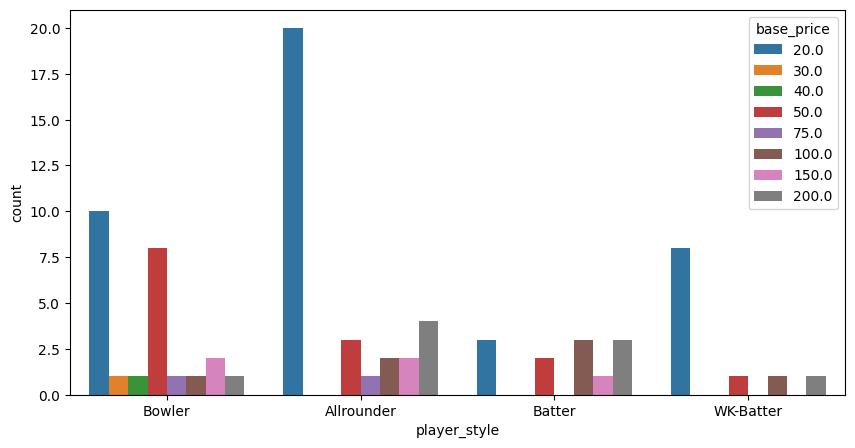

In [13]:
# Handle missing values of base_price

# Visualizing the distribution of player styles by base price
plt.figure(figsize=(10,5))
sns.countplot(data=df, x=df.player_style, hue=df['base_price'])


- As we can see the most 20 lacs base price are all rounders

Base Salary of all rounders counts:
 base_price
20.0     20
200.0     4
50.0      3
150.0     2
100.0     2
75.0      1
Name: count, dtype: int64


<Axes: xlabel='base_price'>

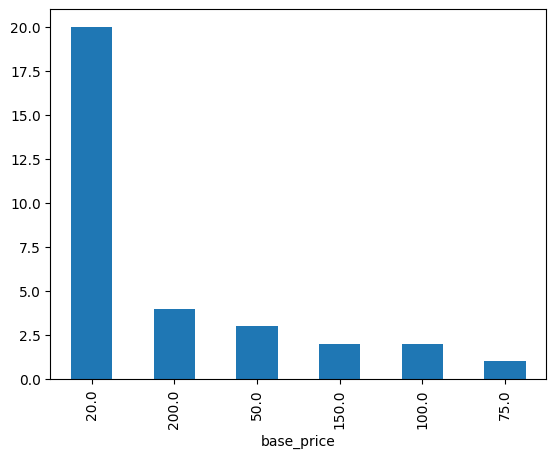

In [14]:
# Analyzing base salary of all-rounders
print('Base Salary of all rounders counts:\n', df['base_price'][df['player_style']=='Allrounder'].value_counts())
df['base_price'][df['player_style']=='Allrounder'].value_counts().plot(kind='bar')


In [15]:
# Exploring player styles frequency
df.player_style.value_counts()

player_style
Bowler        87
Allrounder    77
Batter        44
WK-Batter     30
Name: count, dtype: int64

In [16]:
# Investigating missing base prices for all-rounders
df['player_style'][(df['player_style']=='Allrounder') & (df['base_price'].isnull())].value_counts()

player_style
Allrounder    45
Name: count, dtype: int64

- Out of 77 all rounder players 45 of which have missing base price, as we know most allrounders have 20 lacs base salary so let's fill with 20.

In [17]:
# Imputing missing base prices for all-rounders
df['base_price'][(df['player_style']=='Allrounder') & (df['base_price'].isnull())] = 20

/tmp/ipykernel_19/424758010.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['base_price'][(df['player_style']=='Allrounder') & (df['base_price'].isnull())] = 20
/tmp/ipykernel_19/424758010.py:2: SettingWithCopyWarning: 
A value is try

In [18]:
# Imputing the rest of missing values using KNN imputation 
temp = df.drop(['name'], axis=1)
temp = pd.get_dummies(temp, drop_first=True)

imp = KNNImputer(n_neighbors=2)
imputed_values = imp.fit_transform(temp).astype(int)

df['base_price'] = imputed_values[:, 0]

In [19]:
# data cleaned
df.isnull().sum()

name            0
player_style    0
nationality     0
base_price      0
final_price     0
franchise       0
status          0
dtype: int64

### Analysis: Which franchise spent the most on players?

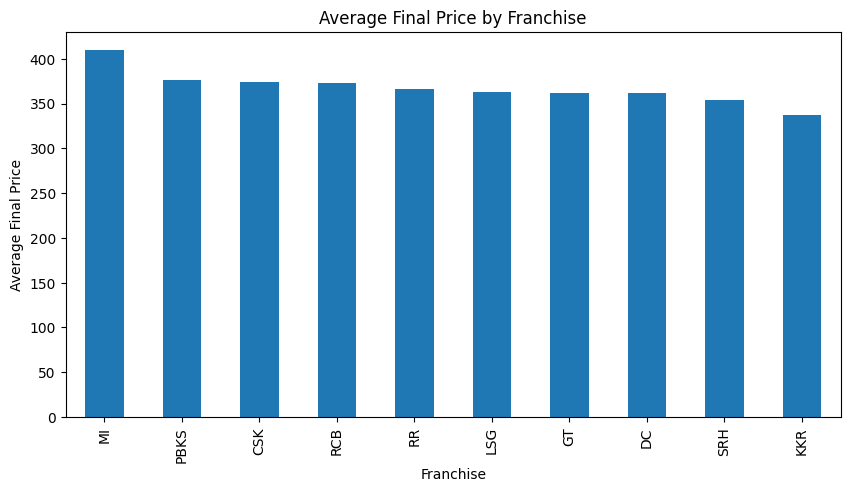

In [20]:
franchise_spending = df.groupby('franchise')['final_price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
franchise_spending.plot(kind='bar')
plt.xlabel('Franchise')
plt.ylabel('Average Final Price')
plt.title('Average Final Price by Franchise')
plt.show()

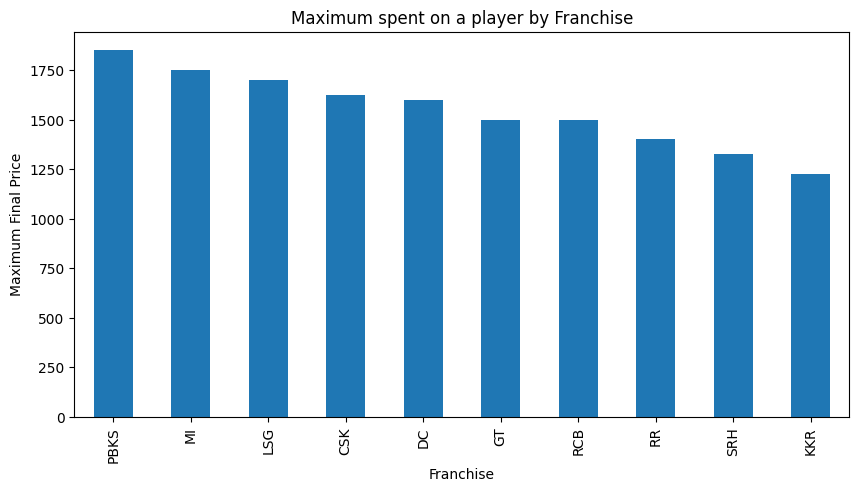

In [21]:
franchise_spending = df.groupby('franchise')['final_price'].max().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
franchise_spending.plot(kind='bar')
plt.xlabel('Franchise')
plt.ylabel('Maximum Final Price')
plt.title('Maximum spent on a player by Franchise')
plt.show()

**Insights:**
- MI franchise spent the most on players on average of 409 lacs
- PBKS bought the most expensive player

### Analysis: Player styles cost

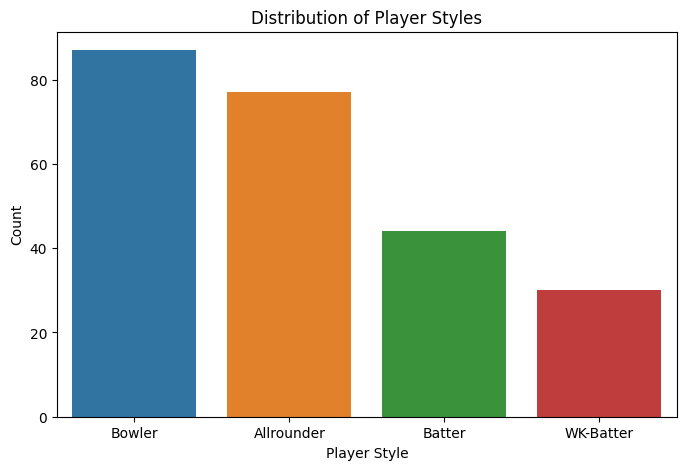

In [22]:
#Distribution of Player Styles
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='player_style')
plt.xlabel('Player Style')
plt.ylabel('Count')
plt.title('Distribution of Player Styles')
plt.show()


In [23]:
df.groupby(['player_style'])['final_price'].describe()

,count,mean,std,min,25%,50%,75%,max
player_style,,,,,,,,
Allrounder,77.0,376.298701,485.561532,20.0,20.00,100.0,650.00,1850.0
Batter,44.0,425.113636,441.586053,20.0,50.00,260.0,781.25,1600.0
Bowler,87.0,290.344828,350.931313,20.0,30.00,120.0,420.00,1500.0
WK-Batter,30.0,488.666667,581.006756,20.0,31.25,170.0,675.00,1700.0


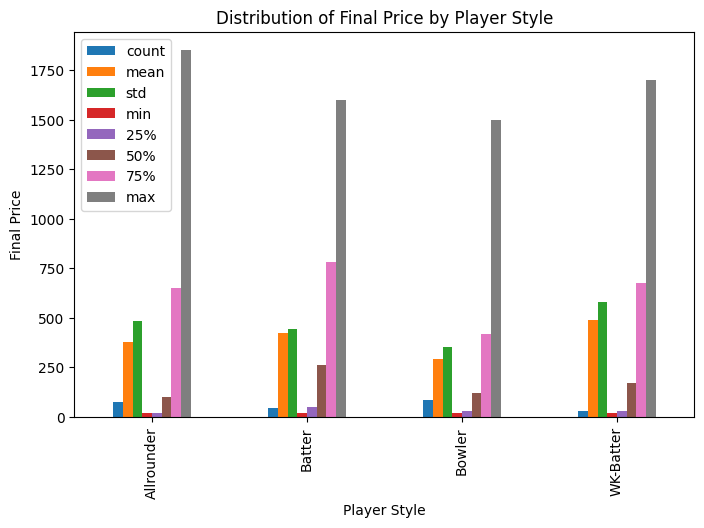

In [24]:
player_style_cost = df.groupby('player_style')['final_price'].describe()

player_style_cost.plot(kind='bar', figsize=(8,5))
plt.xlabel('Player Style')
plt.ylabel('Final Price')
plt.title('Distribution of Final Price by Player Style')
plt.show()

**Insights:**
- On average, Wicket_batters are costliest with 489 lacs
- 2nd costliest are batters with 425 lacs on average, and 25% batters are above 781 lacs
- The least costly were bowlers with 290 lacs on average
- The most expensive player was an allrounder (bought by PBKS)

In [25]:
# Analysis: Who was costliest allrounder player

costliest_allrounder = df[df['final_price'] == df['final_price'].max()]

# Outputting information about the costliest allrounder player
costliest_allrounder

,name,player_style,nationality,base_price,final_price,franchise,status
150,Sam Curran,Allrounder,England,200,1850.0,PBKS,SOLD


**Insight:**
- Sam Curran, an Allrounder player from England, starting with a base price of 200 lacs, and final price of 1850 lacs, was sold to PBKS

### Analysis: Player styles

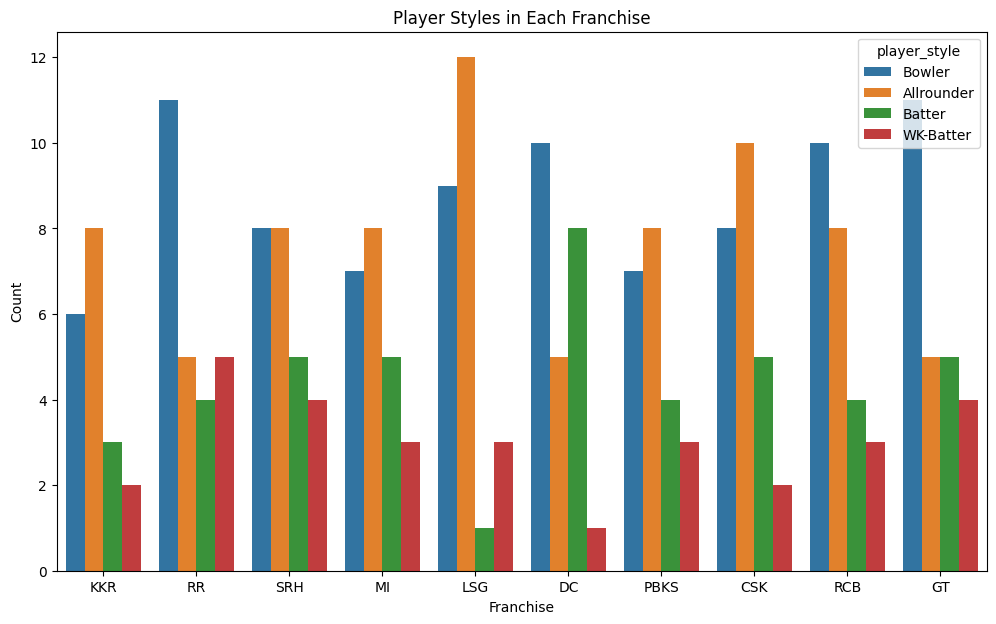

In [26]:
#Player styles in each franchise

plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='franchise', hue='player_style')
plt.xlabel('Franchise')
plt.ylabel('Count')
plt.title('Player Styles in Each Franchise')
plt.show()

**Insights:**
- Most Bowlers are in RR and GT
- Most allrounders in LSG
- Most batters in DC
- Most Wicket-batters in RR

In [27]:
# Player Styles and Nationality
player_styles_nationality = df.groupby('nationality')['player_style'].value_counts().sort_values(ascending=False)

# Outputting information about player styles and nationality
player_styles_nationality

nationality   player_style
India         Bowler          63
              Allrounder      50
              Batter          30
              WK-Batter       19
England       Allrounder       6
Australia     Allrounder       5
South Africa  Batter           5
West Indies   Allrounder       5
England       Bowler           4
South Africa  WK-Batter        4
West Indies   Bowler           4
Australia     Bowler           4
England       Batter           3
South Africa  Allrounder       3
              Bowler           3
Afghanistan   Bowler           3
England       WK-Batter        2
West Indies   Batter           2
Sri Lanka     Bowler           2
New Zealand   Allrounder       2
              Batter           2
              Bowler           2
              WK-Batter        2
Sri Lanka     Batter           1
West Indies   WK-Batter        1
Sri Lanka     Allrounder       1
Namibia       Allrounder       1
Singapore     Allrounder       1
Afghanistan   Allrounder       1
Ireland       Bo

**Insights:**
- Most foreign all-rounders and bowlers are from England
- Most foreign batters and wicket keepers are from South Africa

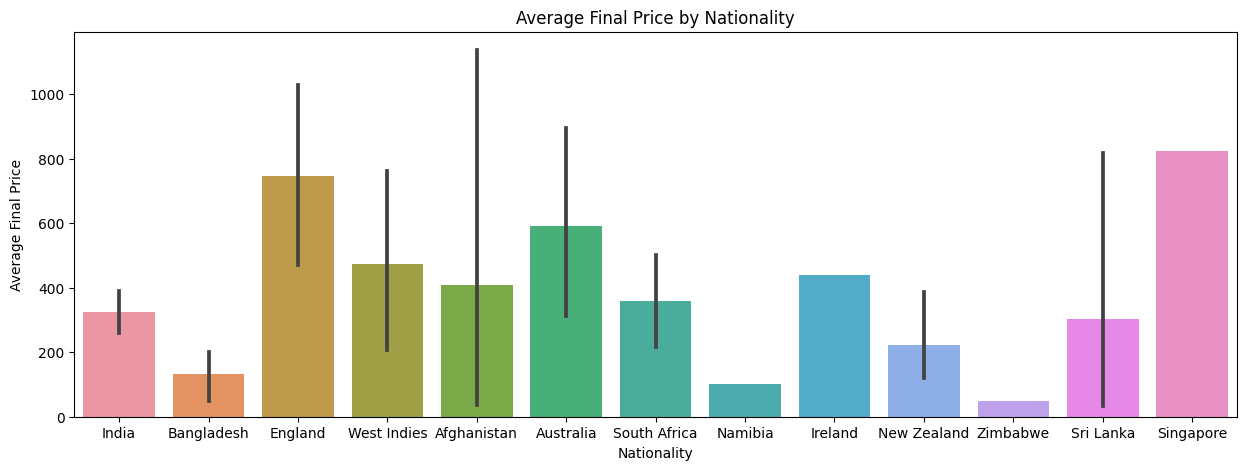

In [28]:
# Costly nationalities
nationality_cost = df.groupby('nationality')['final_price'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 5))
sns.barplot(data=df, x='nationality', y='final_price')
plt.xlabel('Nationality')
plt.ylabel('Average Final Price')
plt.title('Average Final Price by Nationality')
plt.show()

In [29]:
# Correction in nationality data

df[df['nationality']=='Singapore']

,name,player_style,nationality,base_price,final_price,franchise,status
167,Tim David,Allrounder,Singapore,20,825.0,MI,RETAINED


- Tim David is Australian cricketer although he played for singapore between 2019 and 2020, so let's change Tim David nationality to Australia

/tmp/ipykernel_19/3631741051.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['nationality'][df['nationality']=='Singapore'] = 'Australia'
/tmp/ipykernel_19/3631741051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a cop

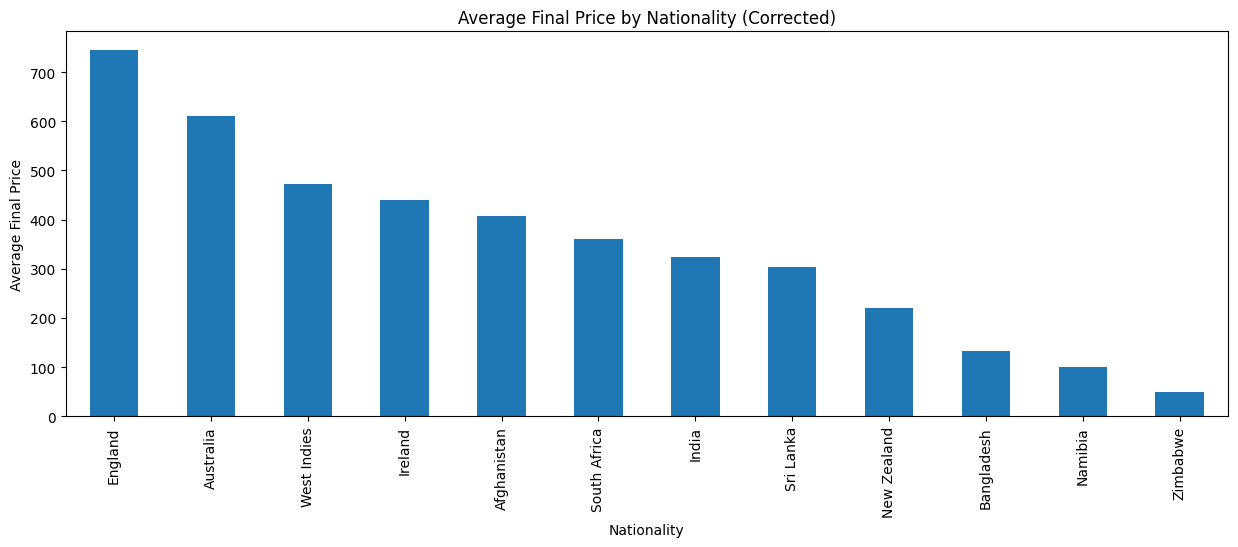

In [30]:
df['nationality'][df['nationality']=='Singapore'] = 'Australia'

# Rechecking nationality-wise average final price
nationality_cost_corrected = df.groupby('nationality')['final_price'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 5))
nationality_cost_corrected.plot(kind='bar')
plt.xlabel('Nationality')
plt.ylabel('Average Final Price')
plt.title('Average Final Price by Nationality (Corrected)')
plt.show()


**Insights:**
- Most foreign players were costly
- England players were the costliest compared to other nationalities

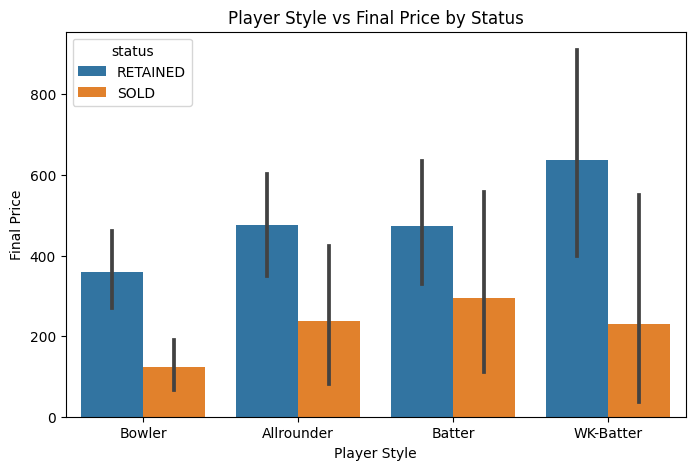

In [31]:
# Player style vs Final price vs Status
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='player_style', y='final_price', hue='status')
plt.xlabel('Player Style')
plt.ylabel('Final Price')
plt.title('Player Style vs Final Price by Status')
plt.show()

**Insights:**
- Larger final price for each player styles are retained by the franchise
- Lower final price for each player style sold

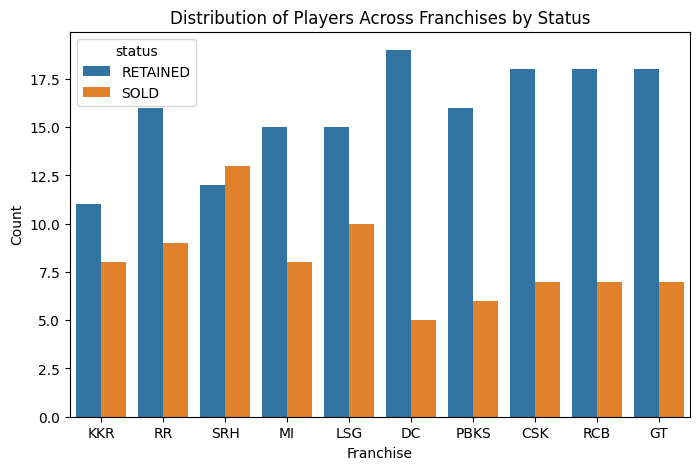

In [32]:
# Distribution of players across franchises by status
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='franchise', hue='status')
plt.xlabel('Franchise')
plt.ylabel('Count')
plt.title('Distribution of Players Across Franchises by Status')
plt.show()

**Insights:**
- DC retained most of its players and bought the least new players
- SRH bought mostly new players compared to retained ones

## Conclusion:
- The Mumbai Indians (MI) franchise spent the most on players, with an average spending of 409 lacs.
- The Punjab Kings (PBKS) bought the most expensive player, Sam Curran, at 1850 lacs.
- Wicket_batters are the costliest player style on average, followed by batters.
- Larger final price for each player styles are retained by the franchise while lower final price for each player style sold
- The nationality with the costliest players is England.
- Various franchises have different strategies for player retention and acquisition, as observed from the distribution of players across franchises by status.

Further analysis could explore the impact of player performance metrics on their final prices or delve deeper into franchise strategies based on player styles. Additionally, collecting data over multiple IPL seasons could provide insights into long-term trends and changes in player valuation dynamics.